## Datasets

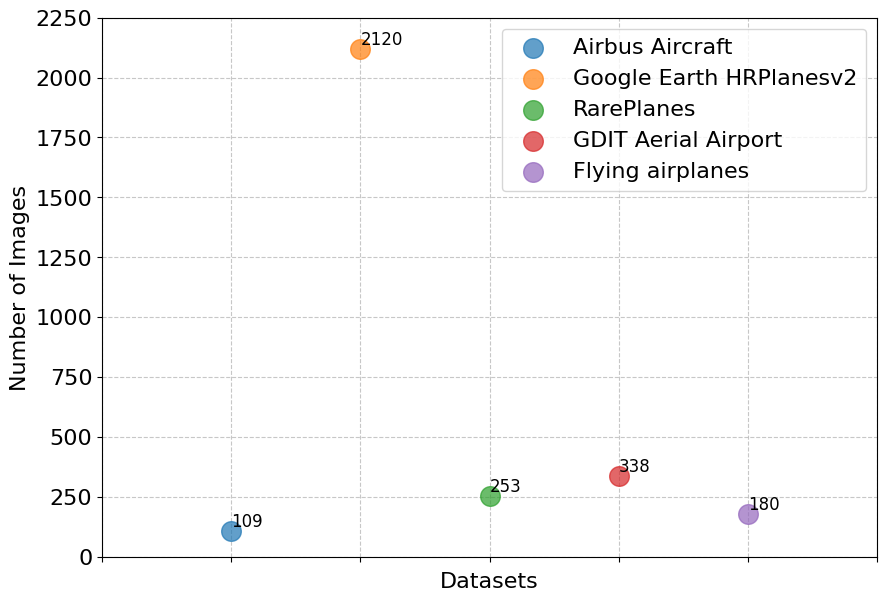

In [8]:
import matplotlib.pyplot as plt

datasets = ["Airbus Aircraft", "Google Earth HRPlanesv2", "RarePlanes", "GDIT Aerial Airport", "Flying airplanes"]
num_images = [109, 2120, 253, 338, 180]

fig, ax = plt.subplots(figsize=(10, 7))
for i, dataset in enumerate(datasets):
    ax.scatter(i, num_images[i], s=200, label=dataset, alpha=0.7)

    ax.text(i, num_images[i], str(num_images[i]), ha='left', va='bottom', fontsize=12)

ax.set_ylabel("Number of Images", fontsize=16)
ax.set_xlabel("Datasets", fontsize=16)

legend = ax.legend(fontsize=16)

ax.set_xticks(range(-1, len(datasets)+1))
ax.set_xticklabels([])

ax.set_yticks(range(0, 2251, 250))
ax.tick_params(axis='both', labelsize=16) 

ax.grid(True, linestyle='--', alpha=0.7, which='both')
ax.set_axisbelow(True)  

plt.savefig("dataset_overview.pdf")

plt.show()

# Resulting curves

You can download the weights and the tensorboard curve results from [Drive](https://drive.google.com/file/d/13aXBJcxKXjqyq7ycAg4LIe8TEmrX-kxa/view?usp=sharing)

```python
pip install gdown

# to upgrade
pip install --upgrade gdown
```

In [1]:
# Download the file
!gdown https://drive.google.com/file/d/13aXBJcxKXjqyq7ycAg4LIe8TEmrX-kxa/view?usp=sharing

# Unzip it in the home folder
%unzip output_tensor.zip

/bin/bash: gdown: command not found


UsageError: Line magic function `%unzip` not found.


You can open tensorboard using the following command:

```python
tensorboard --logdir output_tensor/
```

In [8]:
import re
import csv
from pathlib import Path

# Define the log file path and the output directory structure
log_file_path = 'groundingDINO.log'
output_dir = Path('curve_results')

# Make sure the output directory structure exists
metrics = [
    'bbox_mAP',
    'bbox_mAP_50',
    'bbox_mAP_75',
    'bbox_mAP_s',
    'bbox_mAP_m',
    'bbox_mAP_l',
    'data_time'
]

for metric in metrics:
    (output_dir / metric).mkdir(parents=True, exist_ok=True)

# Regular expression to match the relevant log lines
pattern = re.compile(
    r"Epoch\(val\) \[(\d+)\]\[35/35\]\s+coco/bbox_mAP: (\S+)"
    r".*coco/bbox_mAP_50: (\S+)"
    r".*coco/bbox_mAP_75: (\S+)"
    r".*coco/bbox_mAP_s: (\S+)"
    r".*coco/bbox_mAP_m: (\S+)"
    r".*coco/bbox_mAP_l: (\S+)"
    r".*data_time: (\S+)"
)

# Initialize data storage for each metric
data = {metric: [] for metric in metrics}

# Process the log file
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            for i, metric in enumerate(metrics, start=2):
                value = float(match.group(i))
                data[metric].append((epoch, value))

# Write the results to CSV files
for metric in metrics:
    csv_path = output_dir / metric / 'groundingDINO.csv'
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['epoch', 'Value'])
        writer.writerows(data[metric])

# Output paths to verify where files were saved
list(output_dir.rglob("*.csv"))


[PosixPath('curve_results/bbox_mAP_m/RTMdet.csv'),
 PosixPath('curve_results/bbox_mAP_m/groundingDINO.csv'),
 PosixPath('curve_results/bbox_mAP_m/CenterNet.csv'),
 PosixPath('curve_results/bbox_mAP_m/SSD.csv'),
 PosixPath('curve_results/bbox_mAP_m/Faster-RCNN.csv'),
 PosixPath('curve_results/bbox_mAP_m/DETR.csv'),
 PosixPath('curve_results/bbox_mAP_m/RetinaNet.csv'),
 PosixPath('curve_results/loss/RTMdet.csv'),
 PosixPath('curve_results/loss/Yolo8.csv'),
 PosixPath('curve_results/loss/CenterNet.csv'),
 PosixPath('curve_results/loss/SSD.csv'),
 PosixPath('curve_results/loss/Faster-RCNN.csv'),
 PosixPath('curve_results/loss/Yolo5.csv'),
 PosixPath('curve_results/loss/DETR.csv'),
 PosixPath('curve_results/loss/RetinaNet.csv'),
 PosixPath('curve_results/bbox_mAP/RTMdet.csv'),
 PosixPath('curve_results/bbox_mAP/groundingDINO.csv'),
 PosixPath('curve_results/bbox_mAP/Yolo8.csv'),
 PosixPath('curve_results/bbox_mAP/CenterNet.csv'),
 PosixPath('curve_results/bbox_mAP/SSD.csv'),
 PosixPath('cur

In [11]:
import os
import pandas as pd

def best_mAP(folder_path):
    """
    Function to find the best mAP value in each csv file
    """
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, filename))

            mAP_values = df['Value']

            best_mAP_value = max(mAP_values)
            best_mAP_step = df[df['Value'] == best_mAP_value]['Step'].values[0]

            print(f"In file {filename}, the best mAP value of {best_mAP_value} is obtained at step {best_mAP_step}.")

folder_path = "curve_results/bbox_mAP50/"
best_mAP("curve_results/bbox_mAP50/")
print("-----------------------------------------------------------")
best_mAP("curve_results/bbox_mAP/")


In file RTMdet.csv, the best mAP value of 0.9890000224113464 is obtained at step 240.
In file groundingDINO.csv, the best mAP value of 0.945 is obtained at step 497.
In file Yolo8.csv, the best mAP value of 0.99236 is obtained at step 395.
In file CenterNet.csv, the best mAP value of 0.9869999885559082 is obtained at step 421.
In file SSD.csv, the best mAP value of 0.8600000143051147 is obtained at step 74.
In file Faster-RCNN.csv, the best mAP value of 0.9860000014305116 is obtained at step 8.
In file Yolo5.csv, the best mAP value of 0.99471 is obtained at step 150.
In file DETR.csv, the best mAP value of 0.9850000143051147 is obtained at step 425.
In file RetinaNet.csv, the best mAP value of 0.9700000286102296 is obtained at step 230.
-----------------------------------------------------------
In file RTMdet.csv, the best mAP value of 0.8379999995231628 is obtained at step 340.
In file groundingDINO.csv, the best mAP value of 0.748 is obtained at step 497.
In file Yolo8.csv, the best

In [12]:
# Update the metrics and directories for the new task
train_metrics = ['loss', 'loss_cls', 'loss_bbox']
for metric in train_metrics:
    (output_dir / metric).mkdir(parents=True, exist_ok=True)

# Regular expression to match the relevant "train" log lines
train_pattern = re.compile(
    r"Epoch\(train\)\s+\[(\d+)\]\[\d+/125\].*?"
    r"loss:\s+(\S+)\s+"
    r"loss_cls:\s+(\S+)\s+"
    r"loss_bbox:\s+(\S+)"
)

# Initialize data storage for each metric
train_data = {metric: [] for metric in train_metrics}

# Process the log file for training metrics
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        match = train_pattern.search(line)
        if match:
            step = int(match.group(1))
            for i, metric in enumerate(train_metrics, start=2):
                value = float(match.group(i))
                train_data[metric].append((step, value))

# Write the results to CSV files for training metrics
for metric in train_metrics:
    csv_path = output_dir / metric / 'groundingDINO.csv'
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Step', 'Value'])
        writer.writerows(train_data[metric])

# Output paths to verify where files were saved
list(output_dir.rglob("*.csv"))


[PosixPath('curve_results/bbox_mAP_m/RTMdet.csv'),
 PosixPath('curve_results/bbox_mAP_m/groundingDINO.csv'),
 PosixPath('curve_results/bbox_mAP_m/CenterNet.csv'),
 PosixPath('curve_results/bbox_mAP_m/SSD.csv'),
 PosixPath('curve_results/bbox_mAP_m/Faster-RCNN.csv'),
 PosixPath('curve_results/bbox_mAP_m/DETR.csv'),
 PosixPath('curve_results/bbox_mAP_m/RetinaNet.csv'),
 PosixPath('curve_results/loss/RTMdet.csv'),
 PosixPath('curve_results/loss/groundingDINO.csv'),
 PosixPath('curve_results/loss/Yolo8.csv'),
 PosixPath('curve_results/loss/CenterNet.csv'),
 PosixPath('curve_results/loss/SSD.csv'),
 PosixPath('curve_results/loss/Faster-RCNN.csv'),
 PosixPath('curve_results/loss/Yolo5.csv'),
 PosixPath('curve_results/loss/DETR.csv'),
 PosixPath('curve_results/loss/RetinaNet.csv'),
 PosixPath('curve_results/bbox_mAP/RTMdet.csv'),
 PosixPath('curve_results/bbox_mAP/groundingDINO.csv'),
 PosixPath('curve_results/bbox_mAP/Yolo8.csv'),
 PosixPath('curve_results/bbox_mAP/CenterNet.csv'),
 PosixPat

In [ ]:
# import the plot function
from utils import plot_curves
import tensorboard

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

def plot_curves(directory, color='sienna', separate_subplots=True, ylim_min=0, ylim_max=1, xlim_min=0, xlim_max=500):
    # Get a list of CSV files in the directory and sort them
    csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

    # Define a color map for up to 10 plots
    color_map = {
        0: 'blue',
        1: 'red',
        2: 'green',
        3: 'black',
        4: 'gray',
        5: 'brown',
        6: 'violet',
        7: 'skyblue',
        8: 'orange',
        9: 'purple'
    }

    if separate_subplots:
        # Ensure enough subplots for up to 10 files
        num_files = len(csv_files)
        num_rows = (num_files // 3) + (1 if num_files % 3 != 0 else 0)  # Use 3 columns
        num_cols = min(num_files, 3)

        # Create subplot grid
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axs = axs.flatten()  # Flatten to make indexing easier

        # Iterate over sorted CSV files and plot curves
        for i, csv_file in enumerate(csv_files):
            # Construct the full path to the CSV file
            csv_path = os.path.join(directory, csv_file)

            # Read CSV file into a DataFrame
            df = pd.read_csv(csv_path)

            # Extract relevant columns
            steps = df['Step']
            values = df['Value']

            # Plotting the curve with the specified color
            axs[i].plot(steps, values, color=color_map.get(i, 'black'))  # Default color if out of range
            axs[i].set_title(os.path.splitext(csv_file)[0], fontsize=12)  # Use file name as title
            axs[i].grid(True)
            axs[i].set_xlabel("Steps", fontsize=10)
            axs[i].set_ylabel("Values", fontsize=10)

        # Hide unused subplots
        for j in range(i + 1, len(axs)):
            axs[j].axis('off')

        # Customize the plot
        plt.tight_layout()
        plt.show()
    else:
        # Create a single plot for all curves
        fig, ax = plt.subplots(figsize=(15, 10))

        # Iterate over CSV files and plot curves with different colors
        for i, csv_file in enumerate(csv_files):
            # Construct the full path to the CSV file
            csv_path = os.path.join(directory, csv_file)

            # Read CSV file into a DataFrame
            df = pd.read_csv(csv_path)

            # Extract relevant columns
            steps = df['Step']
            values = df['Value']

            # Plotting each curve with a different color
            ax.plot(steps, values, label=os.path.splitext(csv_file)[0], color=color_map.get(i, 'black'))


        plt.legend(fontsize=20, loc='lower right')
        plt.xlabel("Steps", fontsize=24)
        plt.ylabel("Values", fontsize=24)
        plt.ylim(ylim_min, ylim_max)
        plt.xlim(xlim_min, xlim_max)
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        plt.grid(True)
        plt.savefig("output_fig.pdf", format='pdf')
        plt.show()

In [ ]:

directory_path = 'curve_results/loss'
plot_curves(directory_path, color='royalblue')

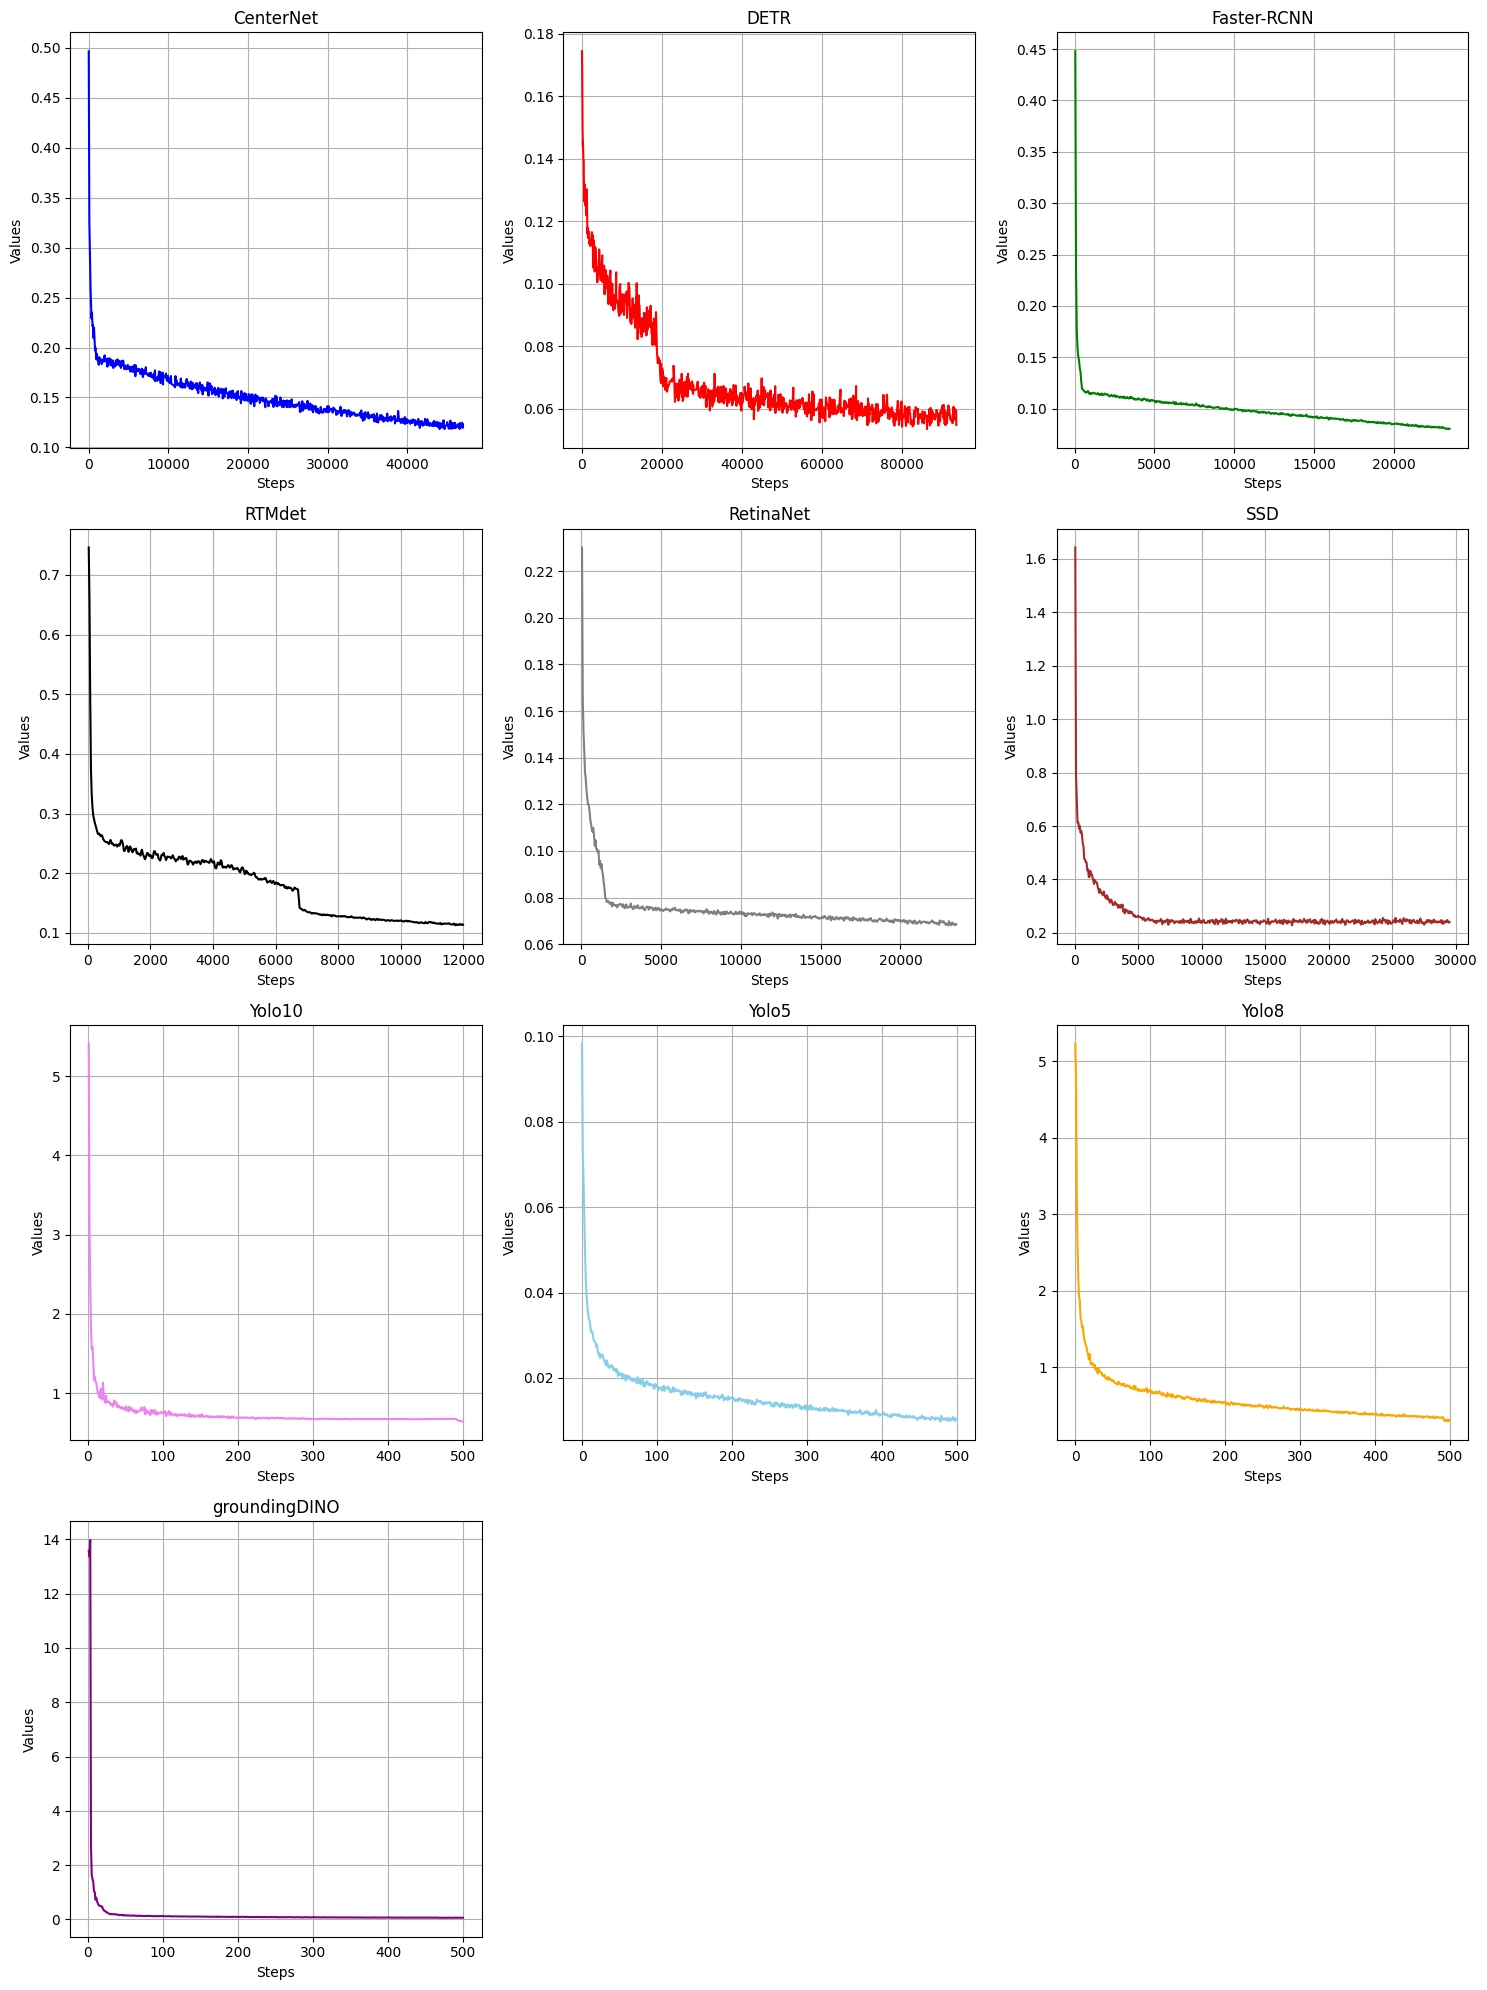

In [3]:

directory = 'curve_results/loss_bbox'
plot_curves(directory, color='navy')

In [ ]:
directory = 'curve_results/loss_cls'
plot_curves(directory, color='blueviolet')

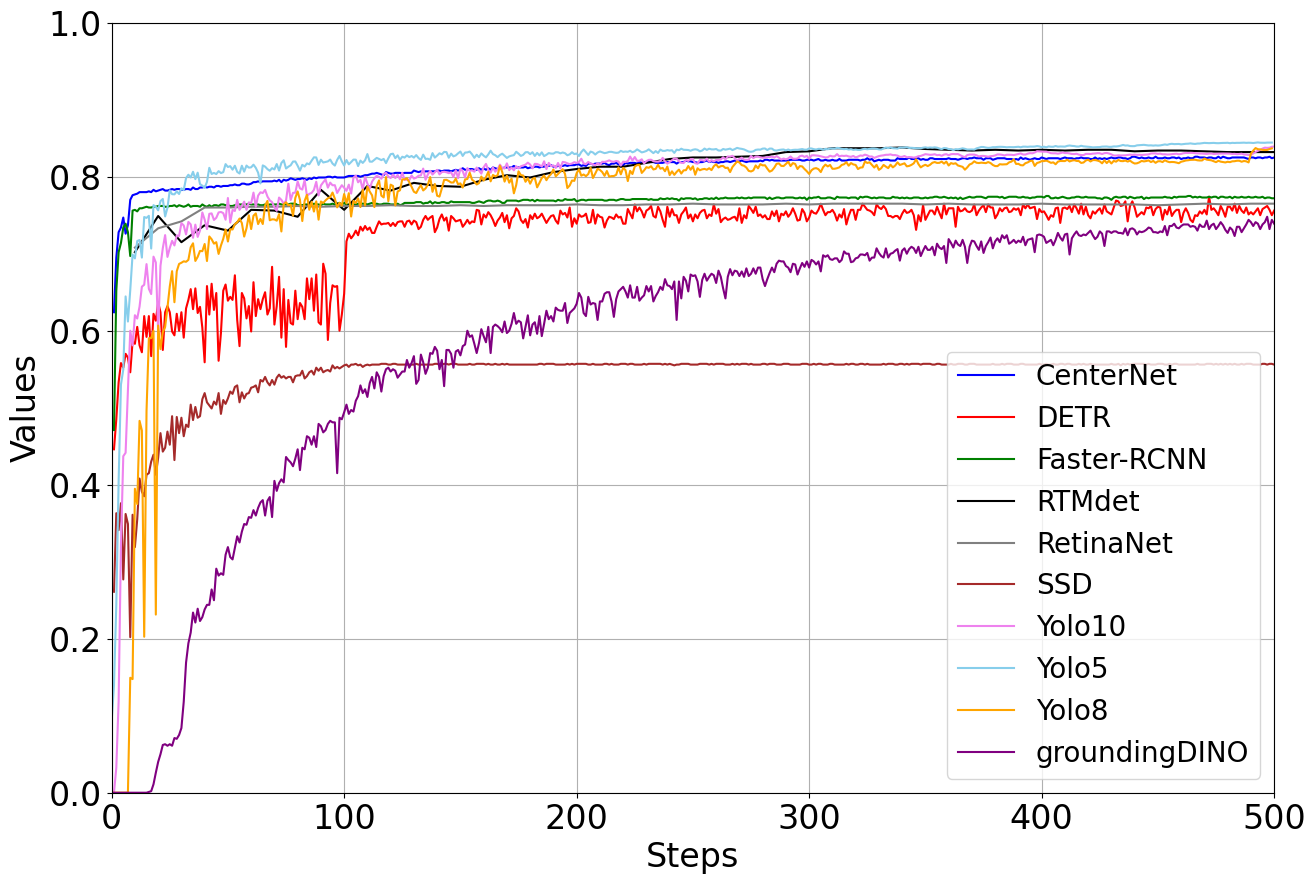

In [2]:
directory = 'curve_results/bbox_mAP'
plot_curves(directory, separate_subplots=False)

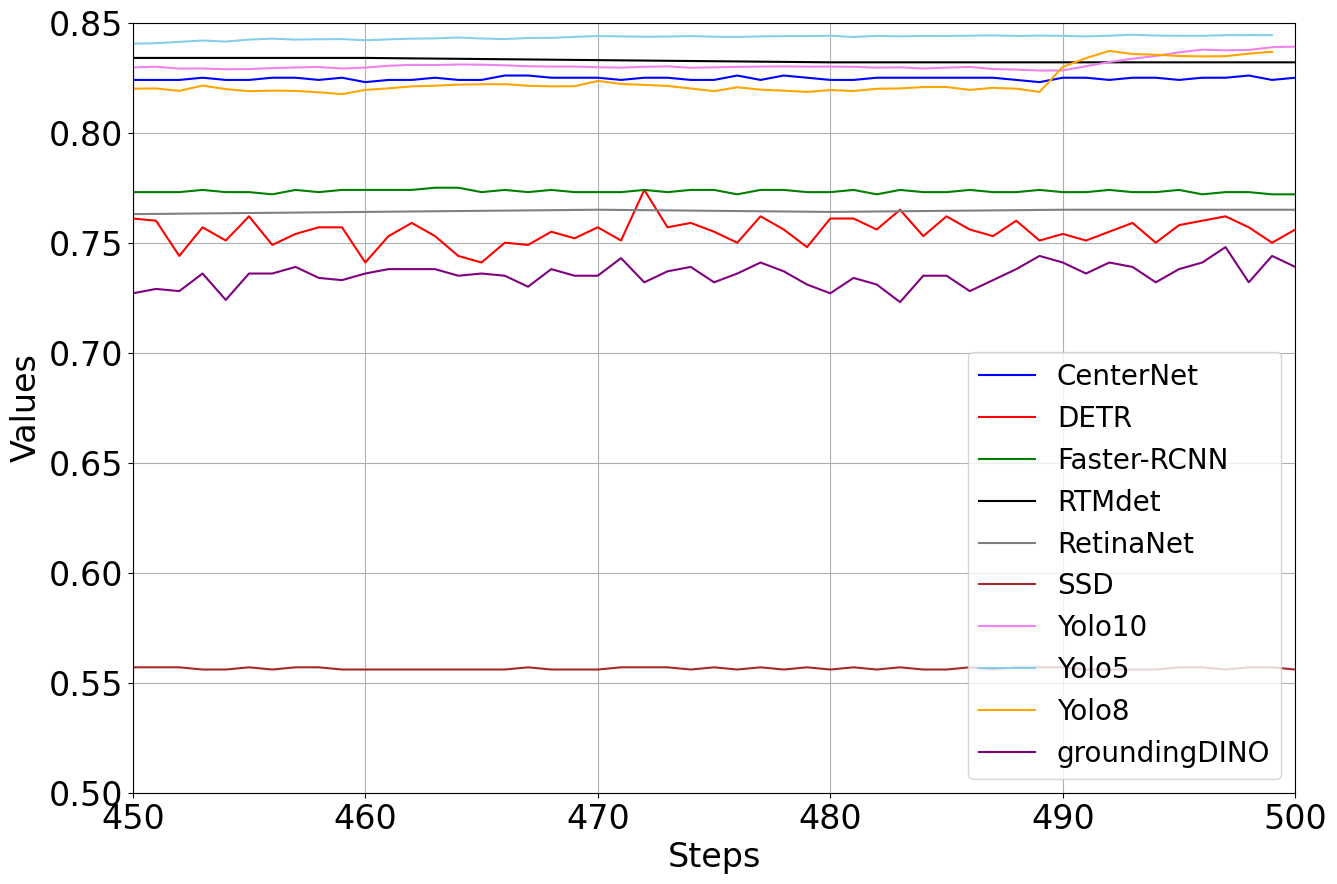

In [3]:
directory = 'curve_results/bbox_mAP'
plot_curves(directory, separate_subplots=False, ylim_min=0.5, ylim_max=0.85, xlim_min=450, xlim_max=500)

In [ ]:
directory = 'curve_results/bbox_mAP_l'
plot_curves(directory, separate_subplots=False)

In [ ]:
directory = 'curve_results/bbox_mAP_m'
plot_curves(directory, separate_subplots=False)

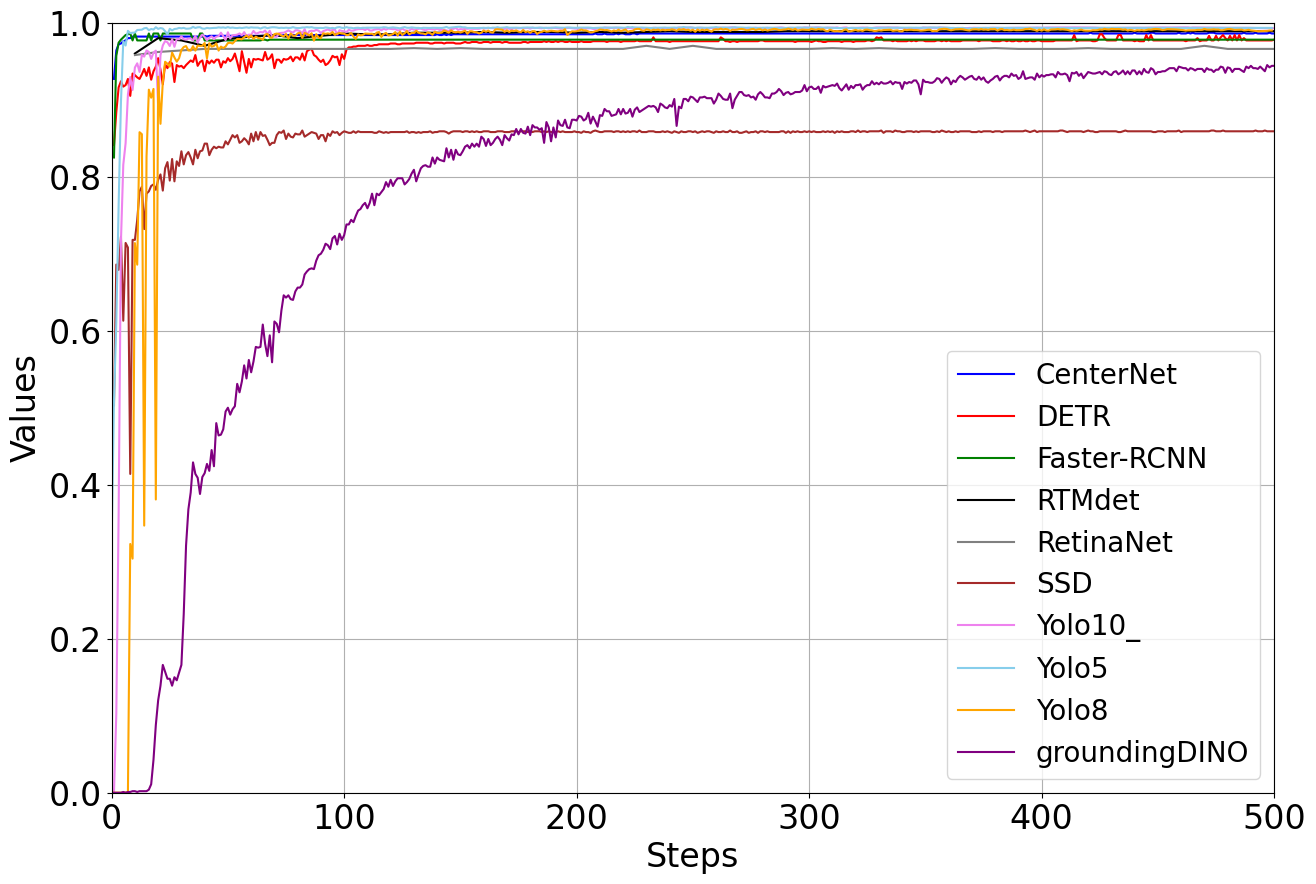

In [6]:
directory = 'curve_results/bbox_mAP50'
plot_curves(directory, separate_subplots=False)

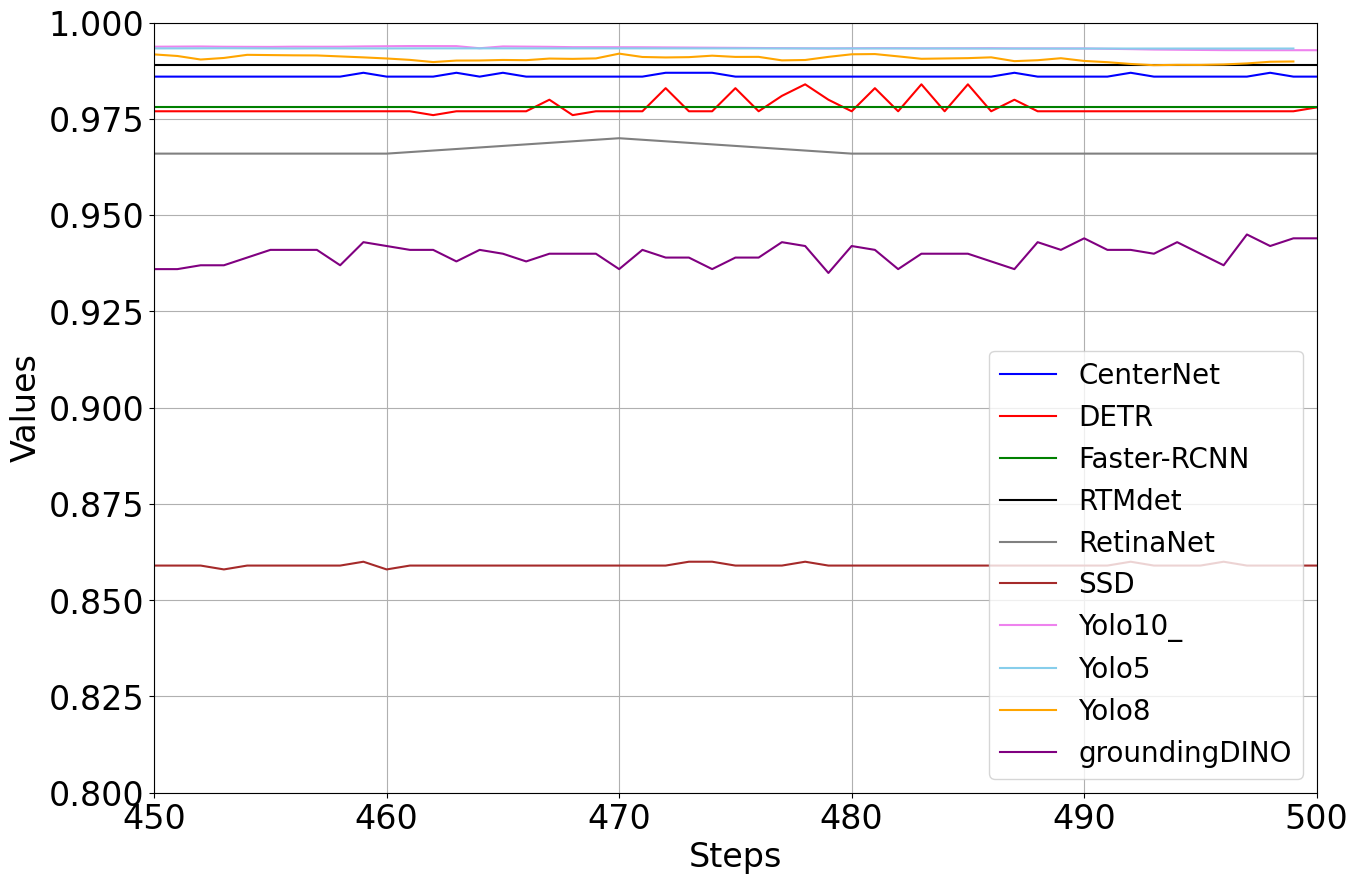

In [7]:
directory = 'curve_results/bbox_mAP50'
plot_curves(directory, separate_subplots=False, ylim_min=0.8, xlim_min=450)

In [ ]:
directory = 'curve_results/bbox_mAP75'
plot_curves(directory, separate_subplots=False)

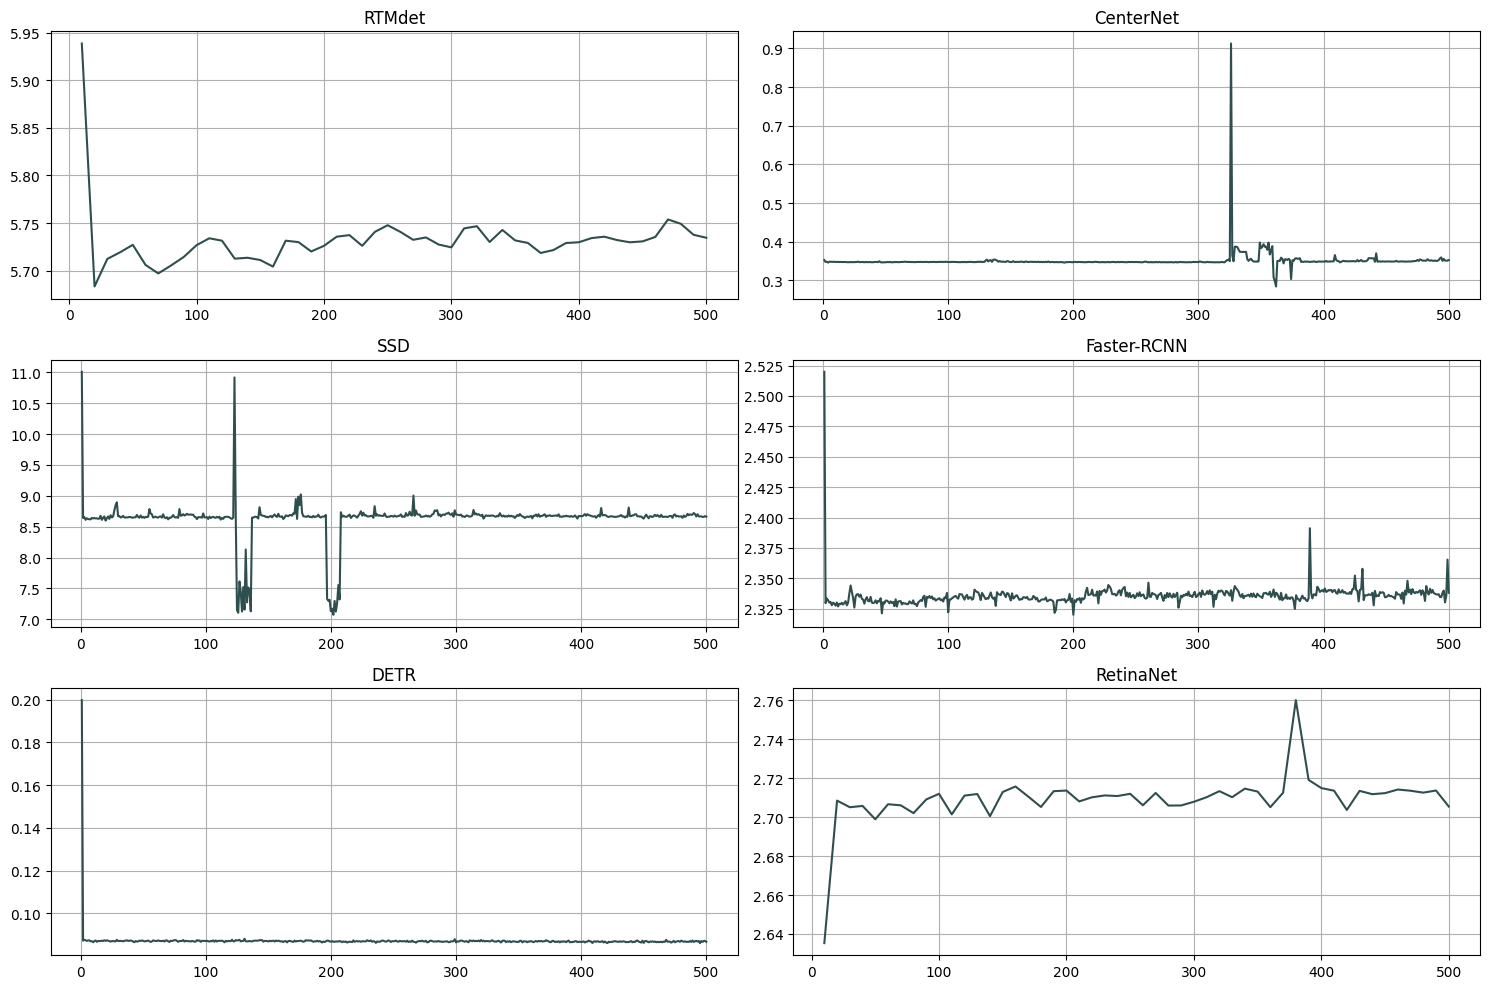

In [7]:
directory = 'curve_results/data_time'
plot_curves(directory, color='darkslategray')

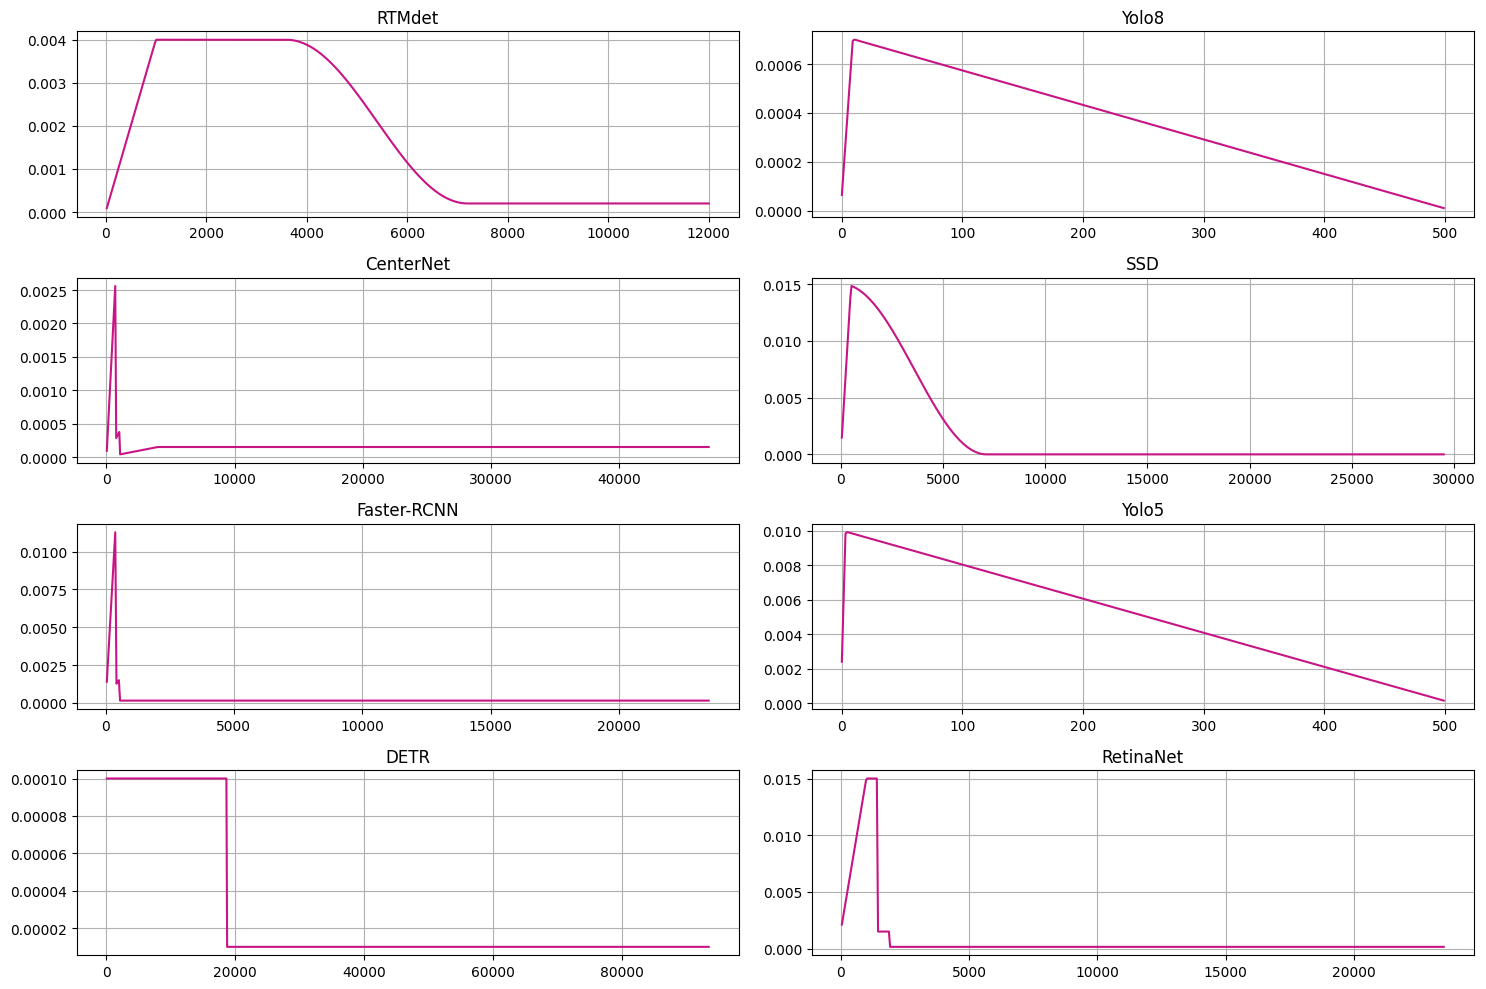

In [9]:
directory = 'curve_results/lr'
plot_curves(directory, color='mediumvioletred')

Best loss for subplot 1: 0.1961094141006469
Best loss for subplot 2: 0.1173737347126007
Best loss for subplot 3: 0.7414489984512329
Best loss for subplot 4: 0.1431415826082229
Best loss for subplot 5: 0.2004915326833725
Best loss for subplot 6: 0.1218846663832664
Best loss for subplot 7: 0.0097655477002263
Best loss for subplot 8: 0.2904399931430816


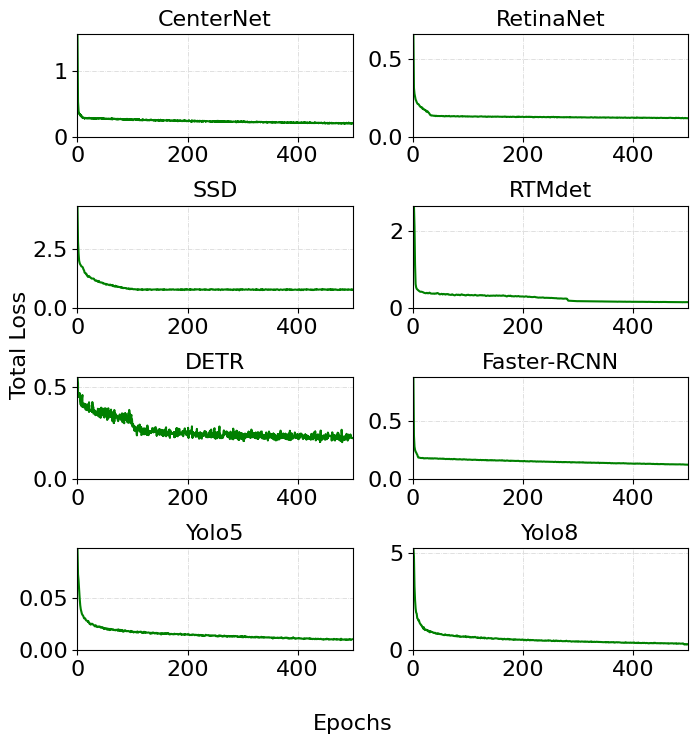

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curve(ax, csv_path, batch_size, total_samples=2120, plot_color='green'):
    df = pd.read_csv(csv_path)

    if 'Step' in df.columns:
        df.rename(columns={'Step': 'iteration'}, inplace=True)

    if 'iteration' in df.columns:
        if batch_size is not None:
            total_iterations_per_epoch = total_samples // batch_size
            df['Epoch'] = (df['iteration'] / total_iterations_per_epoch).astype(int)
        else:
            df['Epoch'] = df['iteration']

    ax.plot(df['Epoch'], df['Value'], color=plot_color)  
    ax.set_title(csv_path.split('/')[-1].split('.')[0], fontsize=16)

    ax.tick_params(axis='both', which='major', labelsize=16)
    return df['Value'].max(), df['Value'].min()

fig, axs = plt.subplots(4, 2, figsize=(7, 7))

models = [
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/CenterNet.csv", 23),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/RetinaNet.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/SSD.csv", 36),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/RTMdet.csv", 86),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/DETR.csv", 11.3),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Faster-RCNN.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Yolo5.csv", None), 
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Yolo8.csv", None) 
]

best_losses = []

for i, (csv_path, batch_size) in enumerate(models):
    row, col = divmod(i, 2)
    max_value, best_loss = plot_loss_curve(axs[row, col], csv_path, batch_size)
    axs[row, col].set_ylim(0, max_value)
    axs[row, col].set_xlim(0, 500)

    axs[row, col].grid(color='lightgray', linestyle='-.', linewidth=0.5)

    best_losses.append(best_loss)

fig.text(0.5, -0.05, 'Epochs', ha='center', fontsize=16)
fig.text(0.01, 0.5, 'Total Loss', va='center', rotation='vertical', fontsize=16)

plt.tight_layout()
plt.xlim(0, 500)

for i, best_loss in enumerate(best_losses):
    print(f"Best loss for subplot {i+1}: {best_loss}")

plt.savefig('totalloss.pdf', bbox_inches='tight')
plt.show()


Best loss for subplot 1: 0.1183704733848571
Best loss for subplot 2: 0.0680956467986106
Best loss for subplot 3: 0.2281092554330825
Best loss for subplot 4: 0.1127032935619354
Best loss for subplot 5: 0.0535632632672786
Best loss for subplot 6: 0.0800270661711692
Best loss for subplot 7: 0.0097655
Best loss for subplot 8: 0.29044


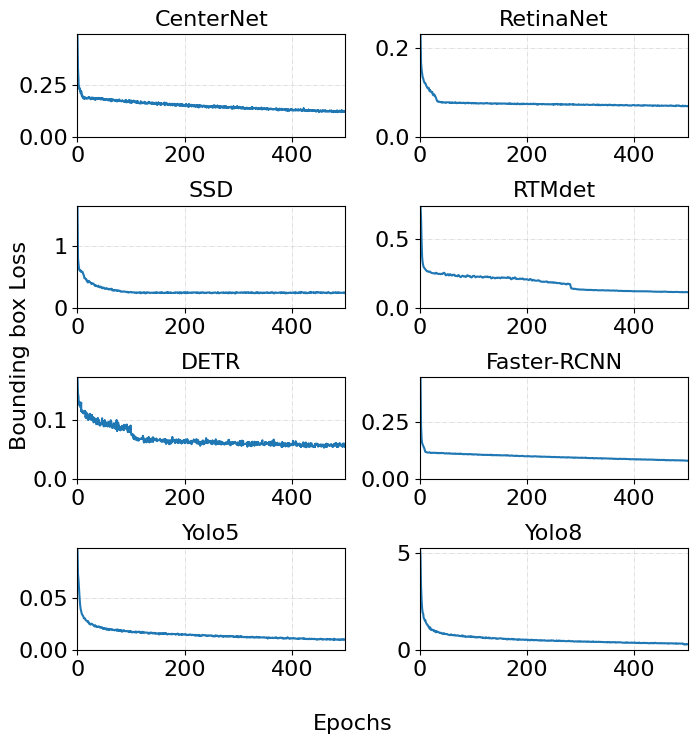

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curve(ax, csv_path, batch_size, total_samples=2120):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    if 'Step' in df.columns:
        df.rename(columns={'Step': 'iteration'}, inplace=True)

    if 'iteration' in df.columns:
        if batch_size is not None:
            total_iterations_per_epoch = total_samples // batch_size
            df['Epoch'] = (df['iteration'] / total_iterations_per_epoch).astype(int)
        else:
            df['Epoch'] = df['iteration']

    ax.plot(df['Epoch'], df['Value']) 
    ax.set_title(csv_path.split('/')[-1].split('.')[0], fontsize=16)  

    ax.tick_params(axis='both', which='major', labelsize=16)

    return df['Value'].max(), df['Value'].min()

fig, axs = plt.subplots(4, 2, figsize=(7, 7))

models = [
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/CenterNet.csv", 23),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/RetinaNet.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/SSD.csv", 36),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/RTMdet.csv", 86),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/DETR.csv", 11.3),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Faster-RCNN.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Yolo5.csv", None),  
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Yolo8.csv", None)   
]

best_losses = []

for i, (csv_path, batch_size) in enumerate(models):
    row, col = divmod(i, 2)
    max_value, best_loss = plot_loss_curve(axs[row, col], csv_path, batch_size)
    axs[row, col].set_ylim(0, max_value)
    axs[row, col].set_xlim(0, 500)

    axs[row, col].grid(color='lightgray', linestyle='-.', linewidth=0.5)

    best_losses.append(best_loss)

plt.tight_layout()
plt.xlim(0, 500)

fig.text(0.5, -0.05, 'Epochs', ha='center', fontsize=16)
fig.text(0.01, 0.5, 'Bounding box Loss', va='center', rotation='vertical', fontsize=16)

for i, best_loss in enumerate(best_losses):
    print(f"Best loss for subplot {i+1}: {best_loss}")

plt.savefig('bboxloss.pdf', bbox_inches='tight')

plt.show()
